In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)

In [66]:
# Problem definition:
# https://archive.ics.uci.edu/ml/datasets/Wine
# Use chemical analysis to determine the origin of wines
#In a classification context, this is a well posed problem with "well behaved" class structures. 
#A good data set for first testing of a new classifier, but not very challenging.

In [67]:
# Let's peek at the data
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [68]:
# The column headers are not very informative. Let us make them so.
# Column labels can be found under https://archive.ics.uci.edu/ml/datasets/Wine (Data set info section)

data.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [69]:
# Let's see the change
data.head()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


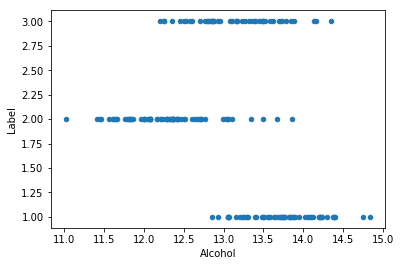

In [70]:
# Let's see relationships of different variables

data.plot.scatter(x = 'Alcohol', y = 'Label')

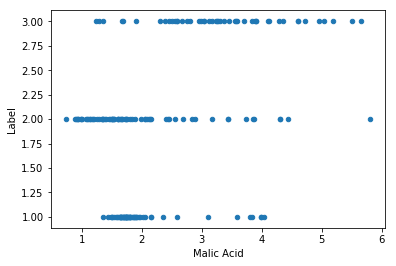

In [71]:
data.plot.scatter(x = 'Malic Acid', y = 'Label')

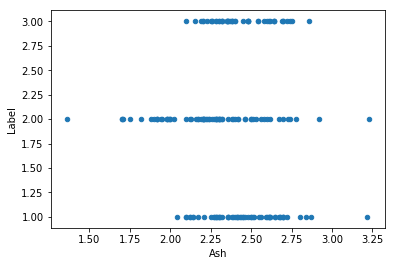

In [72]:
data.plot.scatter(x = 'Ash', y = 'Label')

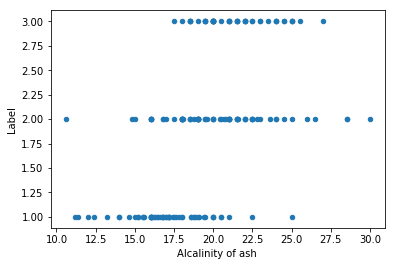

In [73]:
data.plot.scatter(x = 'Alcalinity of ash ', y = 'Label')

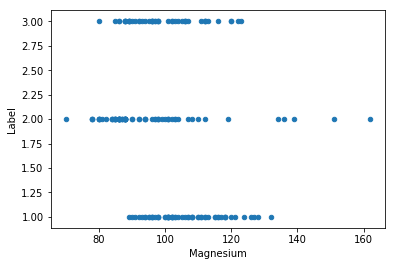

In [74]:
data.plot.scatter(x = 'Magnesium', y = 'Label')

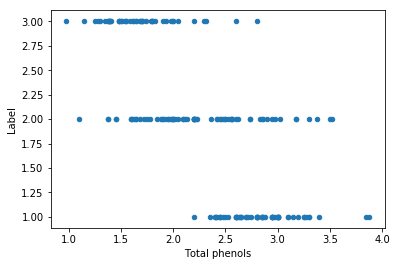

In [75]:
data.plot.scatter(x = 'Total phenols', y = 'Label')

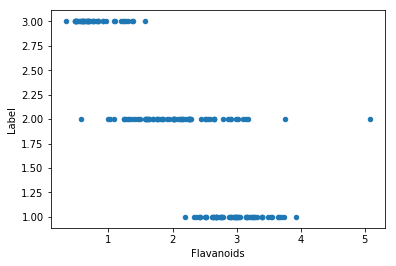

In [76]:
data.plot.scatter(x = 'Flavanoids', y = 'Label')

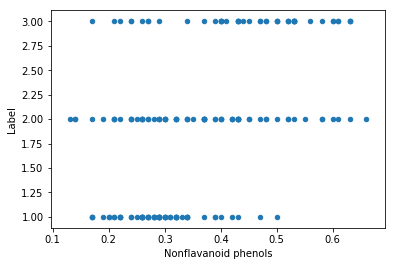

In [77]:
data.plot.scatter(x = 'Nonflavanoid phenols', y = 'Label')

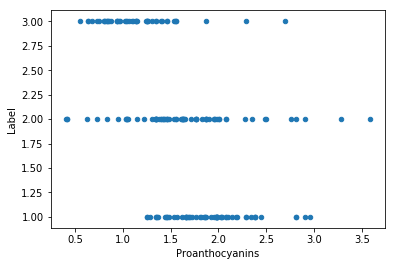

In [78]:
data.plot.scatter(x = 'Proanthocyanins', y = 'Label')

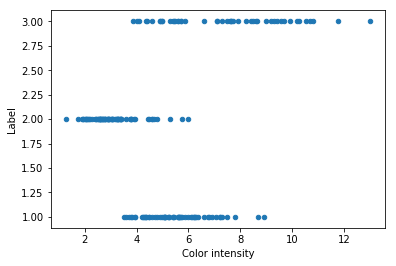

In [79]:
data.plot.scatter(x = 'Color intensity', y = 'Label')

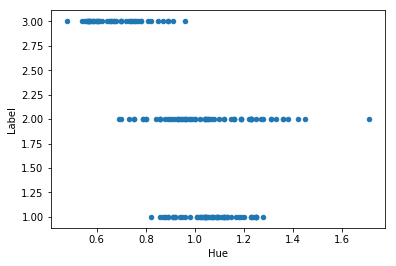

In [80]:
data.plot.scatter(x = 'Hue', y = 'Label')

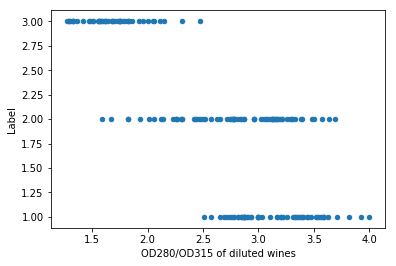

In [81]:
data.plot.scatter(x = 'OD280/OD315 of diluted wines', y = 'Label')

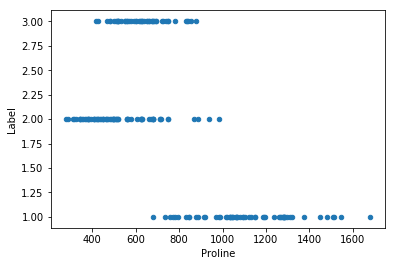

In [82]:
data.plot.scatter(x = 'Proline', y = 'Label')

In [83]:
# Some more info
data.describe()

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [84]:
things = data.values
Y = things[:, 0]
X = things[:, 1:13]

In [85]:
# Randomly shuffle data 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [86]:
# Some features have higher means and standard deviations than others. This implies other data is not standardized.
# We need to standardize it to make it easier for the classifiers to work on.


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [87]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


ppn = Perceptron(max_iter = 1500, eta0 = 0.1, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        14
        2.0       1.00      1.00      1.00        13
        3.0       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        36



In [88]:
from sklearn.linear_model import LogisticRegression
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 1.0

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  0  9]]

Classification report: 
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        14
        2.0       1.00      1.00      1.00        13
        3.0       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        36



In [89]:
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 1 12  0]
 [ 0  0  9]]

Classification report: 
             precision    recall  f1-score   support

        1.0       0.93      1.00      0.97        14
        2.0       1.00      0.92      0.96        13
        3.0       1.00      1.00      1.00         9

avg / total       0.97      0.97      0.97        36



In [90]:
from sklearn.svm import SVC
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
ppn.fit(X_train, Y_train)
y_pred = ppn.predict(X_test)
print("Accuracy score: " + str(accuracy_score(Y_test, y_pred)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report: \n" + str(classification_report(Y_test, y_pred)))

Accuracy score: 0.9722222222222222

Confusion matrix: 
[[14  0  0]
 [ 0 13  0]
 [ 0  1  8]]

Classification report: 
             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        14
        2.0       0.93      1.00      0.96        13
        3.0       1.00      0.89      0.94         9

avg / total       0.97      0.97      0.97        36

